In [6]:
# Load required packages
library(alakazam)
library(dplyr)
library(ggplot2)

# using an airr format data.
# loading my data
db <- readChangeoDb("all_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

In [8]:
db_props <- aminoAcidProperties(db, seq="junction", nt=TRUE, trim=TRUE, label="cdr3")

# The full set of properties are calculated by default
dplyr::select(db_props[1:3, ], starts_with("cdr3"))

,cdr3,cdr3_aa_length,cdr3_aa_gravy,cdr3_aa_bulk,cdr3_aa_aliphatic,cdr3_aa_polarity,cdr3_aa_charge,cdr3_aa_basic,cdr3_aa_acidic,cdr3_aa_aromatic
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GCAAGAGGGGACTGGGACGGGGCCTGGTTTGCTTAC,12,-0.6000000,13.3425,0.2500000,8.416667,-1.001366977,0.08333333,0.16666667,0.3333333
2,GCAAGAAGGCTTGGTGATTACGATGCTATGGACTAC,12,-1.1000000,13.6425,0.4916667,9.016667,-1.003050081,0.16666667,0.25000000,0.1666667
3,GCAAGATGGGGATGGTTACTACAAGCTATGGACTAC,12,-0.1583333,15.6025,0.8166667,7.641667,-0.001683105,0.08333333,0.08333333,0.2500000


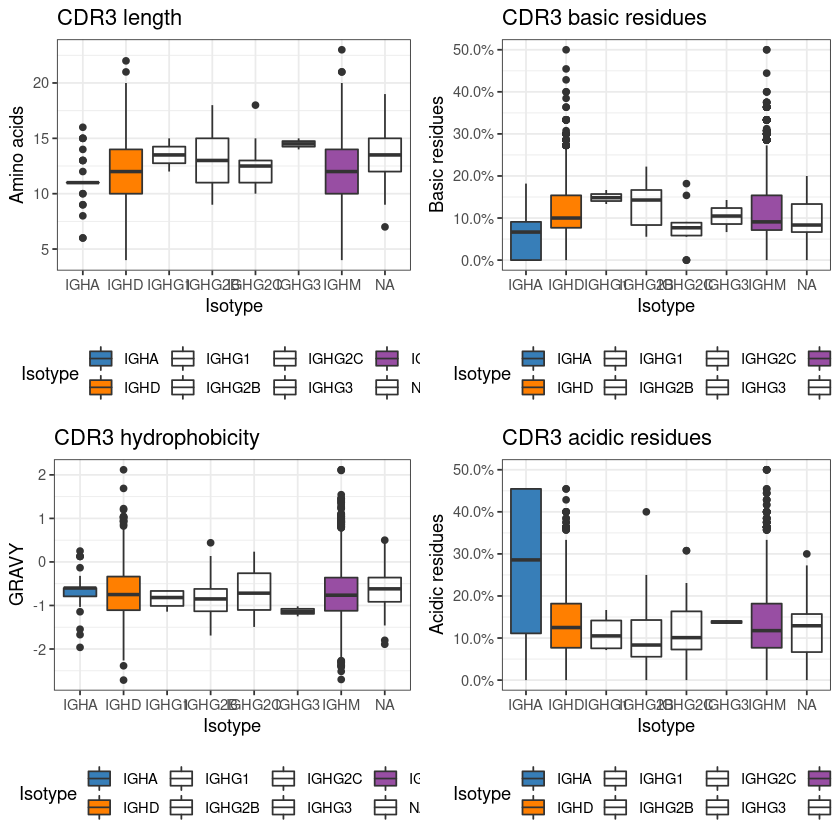

In [9]:
# Define a ggplot theme for all plots
tmp_theme <- theme_bw() + theme(legend.position="bottom")

# Generate plots for all four of the properties
g1 <- ggplot(db_props, aes(x=c_call, y=cdr3_aa_length)) + tmp_theme +
    ggtitle("CDR3 length") + 
    xlab("Isotype") + ylab("Amino acids") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g2 <- ggplot(db_props, aes(x=c_call, y=cdr3_aa_gravy)) + tmp_theme + 
    ggtitle("CDR3 hydrophobicity") + 
    xlab("Isotype") + ylab("GRAVY") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g3 <- ggplot(db_props, aes(x=c_call, y=cdr3_aa_basic)) + tmp_theme +
    ggtitle("CDR3 basic residues") + 
    xlab("Isotype") + ylab("Basic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g4 <- ggplot(db_props, aes(x=c_call, y=cdr3_aa_acidic)) + tmp_theme +
    ggtitle("CDR3 acidic residues") + 
    xlab("Isotype") + ylab("Acidic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))

# Plot in a 2x2 grid
gridPlot(g1, g2, g3, g4, ncol=2)